# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    print('File has not found. Please check')

#### Выведем 5 первых строк и изучим общую информацию по датасету

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Датафрейм состоит из 23699 строк.

Необходимо будет, как минимум, преобразовать тип данных по следующим колонкам:
- first_day_exposition (перевести в формат даты)
- is_apartment (должен быть булев тип данных)
- parks_around3000 и ponds_around3000 можно перевести в тип integer

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Первичные наблюдения по данным:
- по столцу last_price почти на 2 млн отличаются среднее и медианное значения. При этом основной диапазон цен между первым квартилем и третьим выглядит правдоподобно (от 3.4 млн до 6.8 млн). Минимальная цена объекта в 12тыс выглядит странно, надо будет проверить, что это за объект 
- в столбце ceiling_height макс значение 100 м. Скорее всего, ошибка в данных
- странно, что значения по floor есть для всех 23699 строк, а floors_total только для 23613. Проверим в дальнейшем.
    

#### Построим гистограммы

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

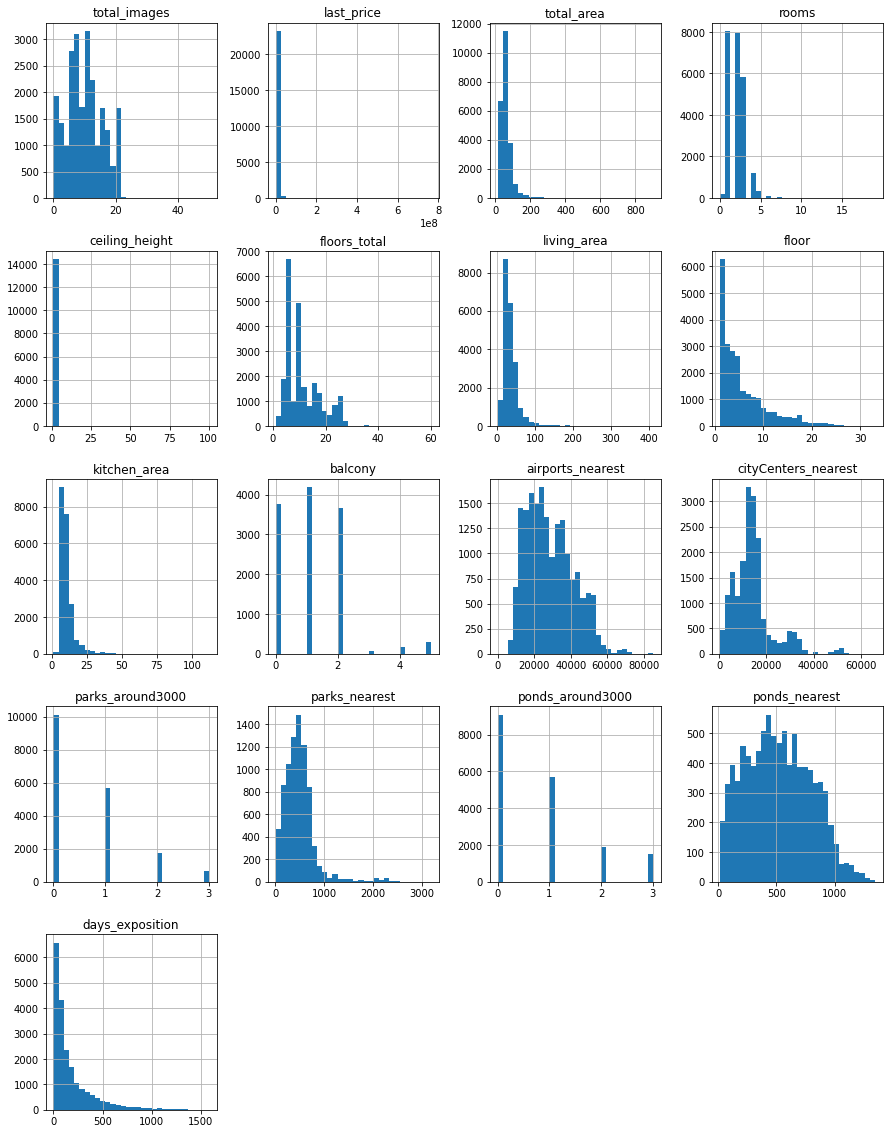

In [ ]:
data.hist(figsize=(15,20), bins=30)

### Предобработка данных

#### Обработка пропусков

Посмотрим, по каким колонкам есть пропуски:

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах есть пропуски. Не все из них критичны для нашего исследования, но стоит попробовать утсранить наибольшее кол-во пропусков, где это будет возможным

**1 столбец с пропусками - высота потолков.** Этот параметр для нас важен, так как он влияет на стоимость объекта (скорее всего влияет)

In [ ]:
data[data['ceiling_height'] > 5]['ceiling_height'].count()

36

В данном столбце присутствуют анамольные значения высоты потолков. Значений с высотой больше 5 метров - всего лишь 36 из 23699. Поэтому для заполнения пропусков будем использовать медиану (2.65 м), а не среднее арифметическое (2.77 м). Тем более, что 2.65 выглядит правдоподобнее (в хрущевках высота 2.5 м ,а в новостройках порядка 2.7 м)

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

In [ ]:
data['ceiling_height'].isna().sum()

0

**Следуюший столбец - floor total.**

In [ ]:
data[(data['floors_total'].isna() == True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Видим, что там, где не указано общая этажность дома, есть значения в стобюце этаж. И там не только 1 . Значений с пропусками в процентном соотношении немного (порядка 0.3%), поэтому можно выполнить логичную замену пропусков в столбце floor_total на значения в стобце floor

In [ ]:
data.loc[data['floors_total'].isna() == True, 'floors_total'] = \
data.loc[data['floors_total'].isna() == True, 'floor']

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Хороший способ)
</div>

In [ ]:
data['floors_total'].isna().sum()

0

**Следующий столбец living area.** В данном стоблце 1903 пропуска. 

In [ ]:
data[data['living_area'].isna() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,NaN,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,NaN,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,NaN,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


In [ ]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Изначально была идея заполнить часть пропусков по жилой зоне как разность между общей площадью и кухней (в датасете есть такие объекты, по которым указана общая площадь и площадь кухни, однако не указана жилая). Однако, потом отказался от этой идеи, так как к жилой плошади помимо кухни не отсносятся также площади санузлов, коридоров, балконов. Поэтому пропуски жилой площади пока оставим. Причиной пропусков в данной колонке может быть то, что это поле не является обязательным для заполнения и пользователи его проигнорировали. Посмотрим какую долю составляют пропуски по данной колонке:

In [ ]:
data['living_area'].isna().mean()

0.08029874678256467

Пропуски всего лишь по 8% объектов. Оставим эту колонку без изменения

Следующий столбец - is_apartment. Отсутствие указания типа недвижимости (жилая или аппартаменты), как правило, указывает на то, что данная недвижимость относится к жилищной. Аппартаменты юридически относятся к нежилой недвижимости, в аппартаментах нельзя зарегистрироваться. Девелопер апартаментов не обязан обеспечивать жителей детсадами, школами, магазинами и другими объектами инфраструктуры.  Заполним пропуски в столбце 'is_apartment' значением False:

In [ ]:
data['is_apartment'] = data['is_apartment'].fillna(False)

print(data['is_apartment'].isna().sum())

0


**Следующий столбец - kitchen area**

In [ ]:
data.loc[(data['kitchen_area'].isna() == True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,False,False,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13.0,NaN,13,False,False,False,NaN,NaN,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0


Причиной пропусков в данной колонке может быть то, что это поле не является обязательным для заполнения и пользователи его проигнорировали. Посмотрим какую долю составляют пропуски по данной колонке:

In [ ]:
data['kitchen_area'].isna().mean()

0.09612219924891345

Пропуски по 9.6% объектов. Оставим эту колонку без изменения

**Следующий столбец - balcony.**

In [ ]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [ ]:
data[data['balcony'].isna() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,False,False,False,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0


Если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0.

In [ ]:
data['balcony'] = data['balcony'].fillna(0)

print(data['balcony'].isna().sum())

0


Пропуски по столбцу балконы заполнили

Остальные пропуски связаны с картографическими данными, не зависящеими от пользователя. Их причиной могло стать то, что пользователь например, не поставил галочку напротив соответсвующих пунктов (показать аэропорт рядом и т.д). 

Посмотрим процентое количесво пропусков:

In [ ]:
data.isna().mean()

total_images            0.000000
last_price              0.000000
total_area              0.000000
first_day_exposition    0.000000
rooms                   0.000000
ceiling_height          0.000000
floors_total            0.000000
living_area             0.080299
floor                   0.000000
is_apartment            0.000000
studio                  0.000000
open_plan               0.000000
kitchen_area            0.096122
balcony                 0.000000
locality_name           0.002068
airports_nearest        0.233850
cityCenters_nearest     0.232879
parks_around3000        0.232837
parks_nearest           0.659100
ponds_around3000        0.232837
ponds_nearest           0.615596
days_exposition         0.134225
dtype: float64

In [ ]:
data.loc[(data['airports_nearest'].isna() == True)].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.65,5.0,30.00,5,False,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


In [ ]:
data.loc[(data['airports_nearest'].isna() == True) & data['locality_name'] == 'Санкт-Петербург'].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Интересно, что по одним и тем же объектам нет картографических сведений про расстояние до аэропорта, парков. Однако, все эти объекты не относятся к г. Санкт-Петербург. Поэтому можно предположить, что вне города-миллионника Санкт-Петербург для объявления не требуется указывать расстояние до парка, аэропорта ввиду не актуальности.

In [ ]:
data[data['days_exposition'].isna() == True].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,False,False,False,7.0,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,False,False,False,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


Пропуски в столбце days_exposition (порядка 13% пропущенных значений от всего датасета) возможно появились из-за того, что объявления были закрыты принудительно.

#### Изменение типов данных

Поменяем тип данных у следующих столбцов:
- first_day_exposition переведем в формат даты (формат datetime)
- floors_total, balcony переведем в integer
- parks_around3000 и ponds_around3000 можно было бы в тип integer, но там есть пропущенные значения, поэтому оставим без изменения типа
- days_exposition переведем в integer, но там есть пропущенные значения, поэтому оставим без изменения типа
    
    

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**first_day_exposition переведем в формат даты (формат datetime)**

In [ ]:
data['first_day_exposition'].head() #прошлый формат даты

0    2019-03-07T00:00:00
1    2018-12-04T00:00:00
2    2015-08-20T00:00:00
3    2015-07-24T00:00:00
4    2018-06-19T00:00:00
Name: first_day_exposition, dtype: object

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['first_day_exposition'] = data['first_day_exposition'].dt.round('1D') #округляем с точностью до дня
data['first_day_exposition'].head() #измененный формат даты

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

**floors_total, balcony переведем в integer**

In [ ]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
#data['parks_around3000'] = data['parks_around3000'].astype('int')
#data['ponds_around3000'] = data['ponds_around3000'].astype('int')
#data['days_exposition'] = data['days_exposition'].astype('int')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

#### Устраним неявные дубликаты в названиях населенных пунктов

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
len(data['locality_name'].unique())

365

In [ ]:
data['locality_name'] = data['locality_name'].str.lower() #переведем названия в нижний регистр

data['locality_name'] = data['locality_name'].str.replace('ё', 'е') #поменяем букву ё на е
#поменяем букву поселок городского типа на поселок (1 дубликат)
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
#поменяем букву городской поселок на поселок (7 дубликатов)
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')

In [ ]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

In [ ]:
len(data['locality_name'].unique())

323

В результате преобразований было уменьшено число уникальных имен в столбце locality_name с 365 до 323. Можно было бы использовать способ брать названия населенных пунктов, начиная с заглавной буквы и отсекая тем самым первую часть (поселок, деревня и тд), однако есть вероятность потерять уникальные значения (например, деревня Лукино и поселок Лукино - это 2 разных населенных пункта).

#### Устранение аномальных значений

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.671463,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.595802,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Устраним аномальные значения высоты потолков.** Для этого все значения больше 20 м разделим на 10 и перезапишем столбец

In [ ]:
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] /= 10 #divide by 10

In [ ]:
data['ceiling_height'].describe() #check

count    23699.000000
mean         2.699480
std          0.276991
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

In [ ]:
set(data['rooms'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 19}

In [ ]:
set(data['balcony'])

{0, 1, 2, 3, 4, 5}

**Устраним аномальные значения в столбце airports_nearest.**

В этом столбце есть минимальное значение 0. Не может квартира находится прямо в аэропорту

In [ ]:
data[data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23,1,2.7,9,19.8,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Видим, что эта квартира находится в г. Санкт-Петербург. Есть расстояние до центра города. Чтобы указать корректное значение расстояния до аэропорта посмотрим объекты в Санкт-Петербурге с таким же расстоянием до центра:

In [ ]:
data.query('22800 <= cityCenters_nearest <= 22850')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3315,6,16250000.0,210.4,2019-04-08,7,2.57,16,159.2,15,False,False,False,15.4,0,санкт-петербург,21137.0,22849.0,0.0,NaN,2.0,348.0,NaN
4753,13,3920000.0,39.0,2018-09-08,1,2.65,16,17.8,3,False,False,False,10.0,0,санкт-петербург,21137.0,22849.0,0.0,NaN,2.0,348.0,20.0
19649,17,3200000.0,31.3,2015-10-30,1,2.63,3,17.2,3,False,False,False,5.3,0,поселок стрельна,27788.0,22832.0,2.0,17.0,3.0,392.0,383.0
21085,0,7000000.0,34.7,2018-09-23,1,2.70,9,19.8,3,False,False,False,6.0,2,санкт-петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


Видим, что можно присвоить расстояние 21137 м

In [ ]:
data.loc[data['airports_nearest'] == 0, 'airports_nearest'] = 21137

In [ ]:
data[data['airports_nearest'] < 1000]['airports_nearest'].count() #checking

0

In [ ]:
data[data['rooms'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,санкт-петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,санкт-петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,санкт-петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.9,0,санкт-петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5,264.5,2,False,False,False,27.6,0,санкт-петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,санкт-петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
20829,6,28659000.0,245.4,2016-03-31,14,2.65,4,168.3,2,False,False,False,25.9,0,санкт-петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0


In [ ]:
data[data['total_area'] > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3117,19,140000000.0,631.0,2019-03-30,7,2.65,5,NaN,5,False,False,False,60.0,0,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
4237,1,50000000.0,517.0,2017-10-14,7,2.65,4,332.0,3,False,False,False,22.0,0,санкт-петербург,22835.0,1847.0,2.0,477.0,2.0,540.0,NaN
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,санкт-петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
8018,20,84000000.0,507.0,2015-12-17,5,4.45,7,301.5,7,True,False,False,45.5,1,санкт-петербург,NaN,5735.0,2.0,110.0,0.0,NaN,1078.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,False,False,False,19.5,1,санкт-петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7,258.0,5,False,False,False,70.0,0,санкт-петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,санкт-петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


**Устраним аномальные значения цены**

Также есть анамальное значение минимальной цены в 12 тыс рублей. Возможно, цена должна быть 12 млн. Посмотрим на этот объект:

In [ ]:
data[data['last_price'] < 150000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,санкт-петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Найдем схожие квариры по площади и расстоянию до центра:

In [ ]:
data.query('105 <= total_area <= 110 and  8000 <= cityCenters_nearest <= 10000')['last_price'].mean()

12167580.75

Видим, что средняя цена на похожие квартиры 12 млн, поэтому исправим цену 12 тыс на 12 млн:

In [ ]:
data.loc[data['last_price'] < 15000, 'last_price'] *= 1000

In [ ]:
data[data['last_price'] < 150000]['last_price'].count()

0

**ВЫВОД**

Аномальные значение исправлены и заменены на корректные. Есть сильные выбросы в столбцах цена, количество комнат, общая площадь. Эти выбросы мы сможем отсечь в дальнейшем, создав датасет good_data

### Посчитайте и добавьте в таблицу новые столбцы

#### Стоимость 1 кв метра

In [ ]:
data['price_square_meter'] = data['last_price'] / data['total_area']

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000


#### Добавим день публикации - столбец weekday

In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1


#### Добавим месяц публикации объявления - столбец month

In [ ]:
data['month'] = data['first_day_exposition'].dt.month

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6


#### Добавим год публикации объявления - столбец year

In [ ]:
data['year'] = data['first_day_exposition'].dt.year

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


#### Добавим тип этажа (первый, последний, другой)

Создадим категоризирующую функцию:

In [ ]:
def categorize_func_floor(row):
    try:
        if row['floor'] == 1:
            return 'первый'
        elif row['floor'] == row['floors_total']:
            return 'последний'
        elif (row['floor'] != 1) and (row['floor'] != row['floors_total']):
            return 'другой'
    except:
        return 'It can not be categorized. Please, check'

In [ ]:
data['floor_type'] = data.apply(categorize_func_floor, axis=1)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


In [ ]:
data['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

Присвоение категорий прошло корректно

#### Переведем расстояние до центра города их метров в км и округлим до целого

Создадим в таблице новый столбец

In [ ]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,cityCenters_nearest_km
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,18180.000000
mean,9.858475,6.542063e+06,60.348651,2.070636,2.699480,10.671463,34.457852,5.892358,10.569807,0.591080,28794.836317,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,9.942637e+04,2.569307,6.400101,2017.367146,14.184818
std,5.682529,1.088699e+07,35.654083,1.078405,0.276991,6.595802,22.030445,4.885249,5.905438,0.959298,12629.200643,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,5.030273e+04,1.789082,3.491561,1.039771,8.616194
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,7.962963e+03,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.659967e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,20.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


#### Строим гистограммы по каждому признаку

##### Построим гистограмму общей площади

<AxesSubplot:>

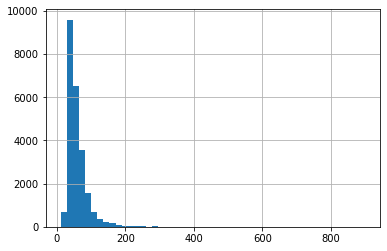

In [ ]:
data['total_area'].hist(bins=50)

Видим, что практически нет значений с площадью больше 200 м2. Проверим, сколько процентов жилья с площадью больше 200 м2:

In [ ]:
len(data[data['total_area'] > 200]) / len(data['total_area'])

0.009578463226296468

Таких квартир меньше 0.1%, поэтому отбросим эти данные и изменим диапазон для гистрограммы на (0, 200) 

<AxesSubplot:>

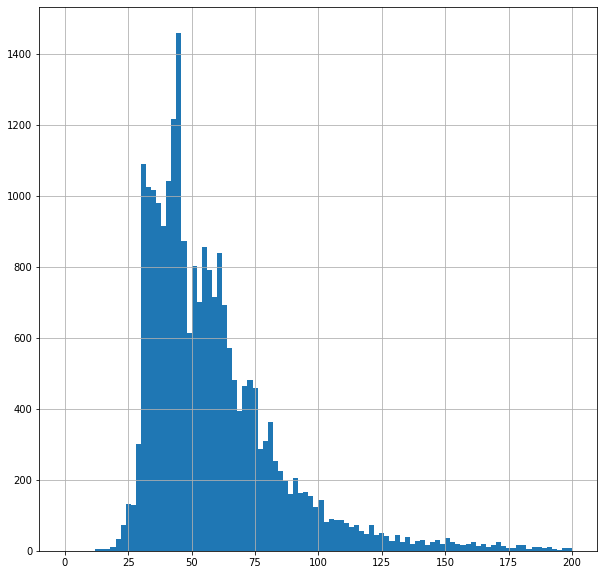

In [ ]:
data['total_area'].hist(bins=100, figsize=(10,10), range=(0,200))

Вывод:


Распределение квартир в зависимости от общей площади в датасете похоже на нормальное распределение. Видим 1 яркий пик в области 45 м2, что подтвержается медианой (52 м2). Больше всего объявлений было в диапазоне от 30 до 100 м2. Среднее значение площади - 60 м2 - смещено от пика вправо, так как у распределения есть "хвост", уходящий вправо. 

In [ ]:
len(data[data['total_area'] < 160]) / len(data['total_area'])

0.9802523313219967

2% квартир имеют площадь больше 160 м2, поэтому можем их отбросить

**Для дальнейших исследований нам будет нужен датасет без выбросов. Назовем его good_data**

По итогу утсранения выбросов из датасета надо постараться сохранить не менее 90% строк

In [ ]:
good_data = data.query('total_area <= 160')

<div class="alert alert-info">
<b>Комментарий студента: v1</b>
<br>Вот создание нового датасета, очищенного от выбросов
</div>

##### Построим гистограмму жилой площади

In [ ]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

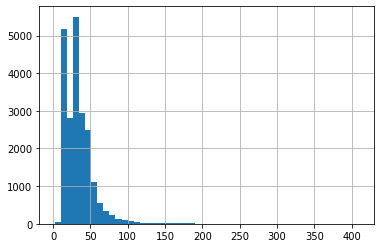

In [ ]:
data['living_area'].hist(bins=50)

Определим оптимальные границы диапазона в котором сосредоточено как минимум 95% объектов

In [ ]:
len(data[data['living_area'] > 70]) / len(data['living_area'])

0.0431663783281995

In [ ]:
len(data[data['living_area'] < 10]) / len(data['living_area'])

0.0010548968310899194

<AxesSubplot:>

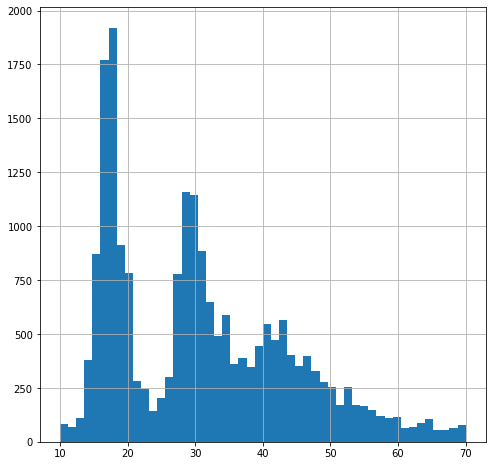

In [ ]:
data['living_area'].hist(bins=50, range=(10,70), figsize=(8,8))

Вывод:

Видим 3 четких пика в областях 18 м2, 30 м2 и 40 м2. Эти пики очень логичны и относятся к самым популярным продаваемым квартирам (1, 2-х и 3-х комнатные квартиры), причем больше всего квартир с малой жилой площадью (студии и 1 комнатные)

In [ ]:
#good_data = good_data.query('10 <= living_area <= 70')

##### Построим гистограмму площади кухни

In [ ]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

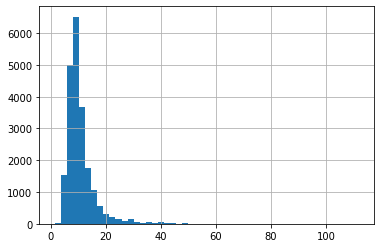

In [ ]:
data['kitchen_area'].hist(bins=50)

Для постороения диаграммы возьмем диапазон значений от 4 до 20, что соответствует усам диаграмм размаха (добавил 1.5 межквартильного размаха (1.5 * 5) к Q3 

<AxesSubplot:>

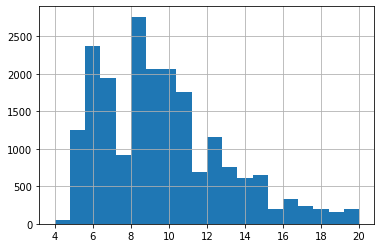

In [ ]:
data['kitchen_area'].hist(bins=20, range=(4, 20))

Вывод:

Видим три пика - 6 м2, 8.5 м2 и 12.5 м2. Это вызвано тем домах старых домах (хрущевках) кухни очень маленькие. Самый популярный размер кухни - порядка 8.5 м2, что тоже хорошо соответствует квартирам даже с 3 комнатами и улучшенной планировки конца советского периода. В современных новостройках кухни стараются выполнять от 12 м2 до 20 м2, поэтому есть третий пик в диапазоне 13 м2.

In [ ]:
len(data[data['kitchen_area'] > 20]) / len(data['kitchen_area'])

0.0431663783281995

In [ ]:
#good_data = good_data.query('4 <= kitchen_area <= 20')

##### Построим гистограмму цены объекта

In [ ]:
data['last_price'].describe()

count    2.369900e+04
mean     6.542063e+06
std      1.088699e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [ ]:
len(data[data['last_price'] > 30000000]) / len(data['last_price'])

0.013333895944976581

In [ ]:
len(data[data['last_price'] < 1000000]) / len(data['last_price'])

0.009451875606565678

<AxesSubplot:>

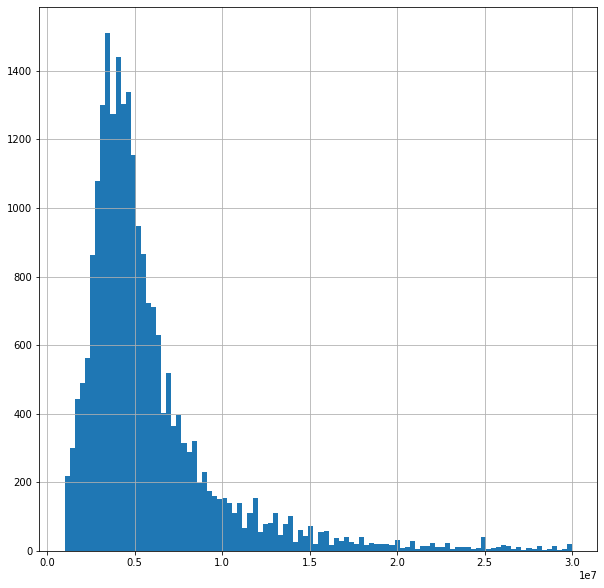

In [ ]:
data['last_price'].hist(bins=100, range=(1000000,30000000), figsize=(10,10))

Вывод:

Распределение цены, как и ожидалось, похоже на стандартное рапределение. Пик приходится на цену порядка 4 млн, что хорошо корредирует с медианой (4.65 млн). Самый распространней ценовой диапазон: от 3.4 млн (Q1) до 6.8 млн (Q3). Справа от пика хвост распределения уходит далеко вправо, что неудивительно, ведь есть элитные районы с дорогой недвижимостью, а также квартиры с большой площадью. Интерес вызывает небольшой пик в районе 25 млн.

In [ ]:
data.query('24000000 <= last_price <= 25100000').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
375,20,25000000.0,140.0,2017-11-25,3,2.80,25,60.00,21,False,False,False,30.00,4,санкт-петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,188.0,178571.428571,5,11,2017,другой,13.0
681,20,24900000.0,249.0,2015-08-13,7,2.65,5,180.00,4,False,False,False,NaN,1,санкт-петербург,24810.0,6108.0,0.0,NaN,0.0,NaN,781.0,100000.000000,3,8,2015,другой,6.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.00,4,False,False,False,16.60,0,санкт-петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0,68870.523416,5,12,2017,другой,8.0
1187,10,25000000.0,201.0,2015-08-07,5,3.50,6,131.00,4,False,False,False,35.00,0,санкт-петербург,26752.0,5458.0,3.0,445.0,0.0,NaN,1117.0,124378.109453,4,8,2015,другой,5.0
1880,1,24466724.0,151.3,2016-05-12,3,3.10,16,92.34,9,False,False,False,12.18,0,санкт-петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,54.0,161710.006609,3,5,2016,другой,8.0
2731,0,25000000.0,148.3,2018-04-04,3,2.65,5,NaN,5,False,False,False,40.20,0,санкт-петербург,36334.0,14486.0,0.0,NaN,0.0,NaN,NaN,168577.208361,2,4,2018,последний,14.0
3267,1,25092624.0,266.2,2015-12-08,5,3.00,3,155.10,1,False,False,False,11.60,0,санкт-петербург,32106.0,5065.0,0.0,NaN,2.0,471.0,660.0,94262.299023,1,12,2015,первый,5.0
4199,8,24900000.0,281.1,2018-02-21,6,3.30,5,193.50,3,False,False,False,26.60,0,санкт-петербург,21480.0,2453.0,3.0,75.0,1.0,795.0,126.0,88580.576307,2,2,2018,другой,2.0
4373,1,24359088.0,151.6,2016-05-12,3,3.10,16,92.34,8,False,False,False,12.29,0,санкт-петербург,37407.0,8434.0,1.0,456.0,2.0,454.0,54.0,160680.000000,3,5,2016,другой,8.0
4748,11,24500000.0,121.3,2019-04-22,4,2.75,17,75.00,2,False,False,False,14.00,0,санкт-петербург,10195.0,11065.0,0.0,NaN,0.0,NaN,NaN,201978.565540,0,4,2019,другой,11.0


за 25 млн - это в основном квартиры в Санкт-Петербурге недалеко от центра города

Запишем в датасет good_data (возьмем диапазон от 1 млн до 15 млн):

In [ ]:
good_data = good_data.query('1000000 <= last_price <= 15000000')
#good_data = data.query('1000000 <= last_price <= 15000000')

In [ ]:
len(data[data['last_price'] > 15000000]) / len(data['last_price'])

0.050803831385290515

In [ ]:
len(data[data['last_price'] < 1000000]) / len(data['last_price'])

0.009451875606565678

Взяв диапазон в good_data от 1 млн до 15 млн мы охватим более 90% датасета и избавимся от выбросов в цене

<div class="alert alert-info">
<b>Комментарий студента: v1</b>
<br> Отсеиваем аномальные значения по цене
</div>

##### Построим гистограмму количества комнат

In [ ]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

<AxesSubplot:>

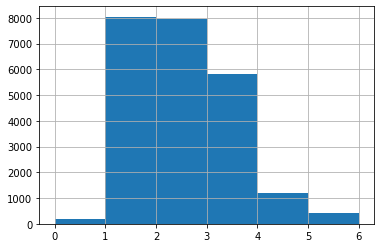

In [ ]:
data['rooms'].hist(bins=6, range=(0,6))

In [ ]:
len(data[data['rooms'] > 6]) / len(data['rooms'])

0.00379762859192371

Число квартир с количесвом комнат больше 6 всего лишь 0.4%, поэтому можно их отбросить 

Вывод:

Распределение стремится к нормальному. Больше всего квартир с количеством комнат 1, 2 и 3, что вплоне логично. Квартир к с количеством комнат 4+ на порядок меньше

In [ ]:
good_data = good_data.query('rooms <= 6')

<div class="alert alert-info">
<b>Комментарий студента: v1</b>
<br> Отсеиваем аномальные значения по количеству комнат
</div>

##### Построим гистограмму высоты потолков

In [ ]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.699480
std          0.276991
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         20.000000
Name: ceiling_height, dtype: float64

In [ ]:
len(data[data['ceiling_height'] > 3.5]) / len(data['ceiling_height'])

0.011941432127937888

<AxesSubplot:>

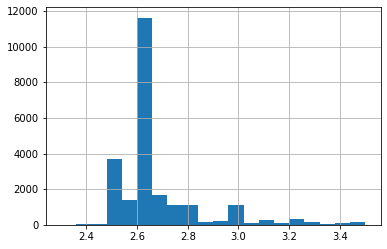

In [ ]:
data['ceiling_height'].hist(bins=20, range=(2.3, 3.5))

Вывод:

В РФ минимальная высота потолка должна составлять 2.4 метра, стандартная высота от 2.5 до 2.7 метров. В элитных домах может достигать 3 метров. Данные требования хорошо отражены на гистограмме. Интересно, что достаточно много квартир с высотой потолка больше 3 м - это особенность исторических домов г. Санкт-Петербург

Запишем в датасет good_data:

In [ ]:
good_data = good_data.query('2.3 <= ceiling_height <= 3.5')

<div class="alert alert-info">
<b>Комментарий студента: v1</b>
<br> Отсеиваем аномальные значения по высоте потолков
</div>

##### Построим гистограмму по этажам

In [ ]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [ ]:
len(data[data['floor'] > 25]) / len(data['floor'])

0.0016878349297438711

порядка 0.2% квартир на этаже больше 25

<AxesSubplot:>

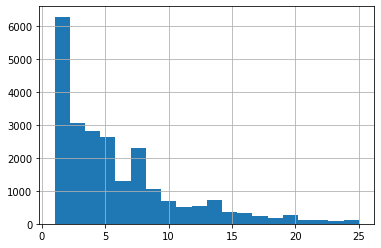

In [ ]:
data['floor'].hist(bins=20, range=(1,25))

Распределение похоже на распределение Пуассона. Большинство квартир сосредоточено в диапазоне от 1 до 10 этажа.

Запишем в датасет good_data:

In [ ]:
good_data = good_data.query('1 <= floor <= 25')

<div class="alert alert-info">
<b>Комментарий студента: v1</b>
<br> Отсеиваем аномальые значения по этажности
</div>

##### Построим гистограмму по типу этажа

<AxesSubplot:>

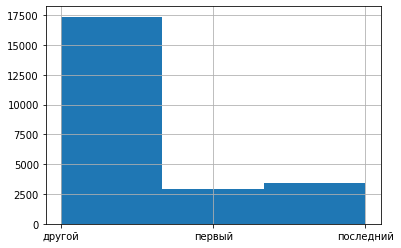

In [ ]:
data['floor_type'].hist(bins=3)

Вывод:

Количество продаваемых квартир на первом и последнем этаж практически равно, что логично. Ведь, как правило, число квартир на первом этаже такое же как и на последнем (особенно в старом фонде). В новостройках на первых этажах больше коммерческих помещений, поэтому все же есть перевес в сторону квартир на последнем этаже.

##### Построим гистограмму по общему количеству этажей

In [ ]:
data['floors_total'].describe()

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

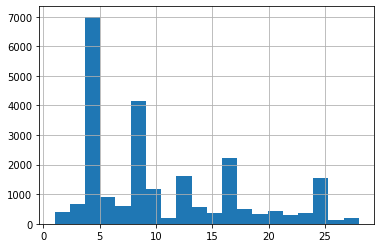

In [ ]:
data['floors_total'].hist(bins=20, range=(1,28))

Вывод:

Больше всего домов с этажностью 5 и 9. Соответсвенно, медиана попала на значение 9, что соответсвует действительности. Также небольшие экстремумы приходятся на 16 и 25 этажные дома, что является типичным для современных новостроек

In [ ]:
len(data[data['floors_total'] > 28]) / len(data['floors_total'])

0.0013924638170386937

Запишем в датасет good_data:

In [ ]:
good_data = good_data.query('floors_total <= 28')

<div class="alert alert-info">
<b>Комментарий студента: v1</b>
<br> Отсеиваем аномальные значения по общей этажности
</div>

##### Построим гистограмму по расстоянию до центра города в метрах

In [ ]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<AxesSubplot:>

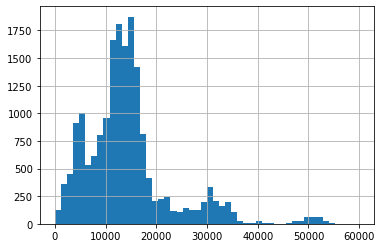

In [ ]:
data['cityCenters_nearest'].hist(bins=50, range=(0,60000))

Вывод:

Распределение похоже на нормальное, однако есть несколько писков - 5 км, 15 км и небольшие - 30 км и 50 км. Небольшие пики связаны с тем, что на этом расстоянии от центра (скорее всего, центра Санкт-Петербурга) находятся крупные населенные пункты. Большинство квартир на расстоянии 15 км, что вполне соответсвует спальным районам северной столицы (тем более там есть метро даже до Ленинградской области)) )

In [ ]:
#good_data = good_data.query('cityCenters_nearest <= 60000')

##### Построим гистограмму по расстоянию до ближайшего аэропорта

In [ ]:
data['airports_nearest'].describe()

count    18157.000000
mean     28794.836317
std      12629.200643
min       6450.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

<AxesSubplot:>

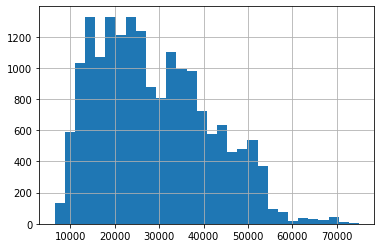

In [ ]:
data['airports_nearest'].hist(bins=30, range=(6500, 75000))

Вывод:

Распределение похоже на нормальное. Пик приходится на значеник 25 км, что хорошо совпадает с медианой 26.7 км. Большинство квартир квартир находится не дальше 55 км от аэропорта

In [ ]:
#good_data = good_data.query('6500 <= airports_nearest <= 75000')

##### Построим гистограмму по расстоянию до ближайшего парка

In [ ]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

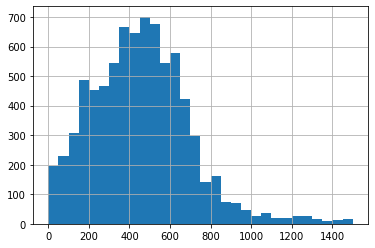

In [ ]:
data['parks_nearest'].hist(bins=30, range=(0, 1500))

Вывод:

Распределение похоже на нормальное. Пик приходится на значение 500 м, что похоже на правду.

In [ ]:
#good_data = good_data.query('parks_nearest <= 1500')

##### Построим гистограмму по дню и месяцу объявления

In [ ]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,cityCenters_nearest_km
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,18180.000000
mean,9.858475,6.542063e+06,60.348651,2.070636,2.699480,10.671463,34.457852,5.892358,10.569807,0.591080,28794.836317,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,9.942637e+04,2.569307,6.400101,2017.367146,14.184818
std,5.682529,1.088699e+07,35.654083,1.078405,0.276991,6.595802,22.030445,4.885249,5.905438,0.959298,12629.200643,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,5.030273e+04,1.789082,3.491561,1.039771,8.616194
min,0.000000,4.300000e+05,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,7.962963e+03,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,7.659967e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,1.142563e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,20.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


<AxesSubplot:>

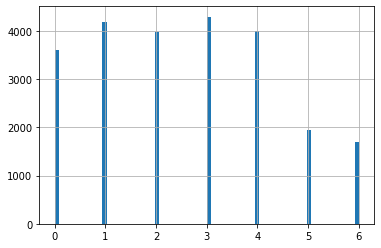

In [ ]:
data['weekday'].hist(bins=70)

Больше всего объявлений выкладывали в будние дни и почти в 2 раза меньше в выходные (скорее всего связано с тем, что многие объявление создавали риэлторы)

<AxesSubplot:>

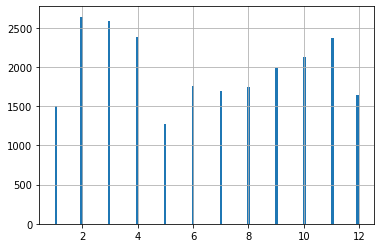

In [ ]:
data['month'].hist(bins=120)

Больше всего объявлений в конце зимы и начале весны, летом спад (так как многие в отпуске) и далее тренд на возрастание вплоть до декабря (а там новый год и людям не до прожажи квартир)

#### Изучим, как быстро продавались квартиры (столбец days_exposition).

In [ ]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

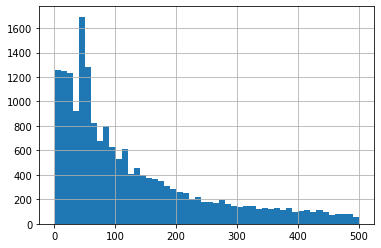

In [ ]:
data['days_exposition'].hist(bins=50, range=(1,500))

Похоже на распределение Пуассона. Средний срок размещения объявления - 180 дней, значение медианы - 95. Половину квартир продадут уже через 219 дней. Можно считать, что продажа прошла очень быстро если она прошла за менее чем месяц, и очень долго если она длилась более года.

<AxesSubplot:>

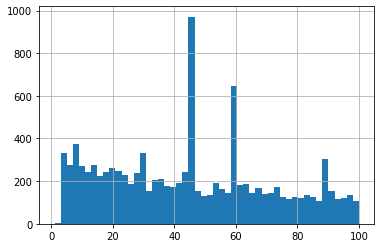

In [ ]:
data['days_exposition'].hist(bins=50, range=(1,100))

На срезе от 0 до 100 дней четко видно 2 пика - 45 дней и 60 дней - стандартные сроки размещения объявлений

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Здорово, что ты заметил эти всплески! Это действительно особенность функционирования системы размещения объявлений. Убедиться в этом можно по ссылке ниже

	https://yandex.ru/support/realty/owner/home/add-ads-housing.html
</div>

#### Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Зависимость цены от общей площади объекта

Посмотрим кф корреляции Пирсона. Будем использовать хороший датасет без выбросов good_data

In [ ]:
good_data['last_price'].corr(good_data['total_area'])

0.7452249681440068

Видим, что существует положительная корреляция между ценой и общей площадью. Построим диаграмму рассеяния

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

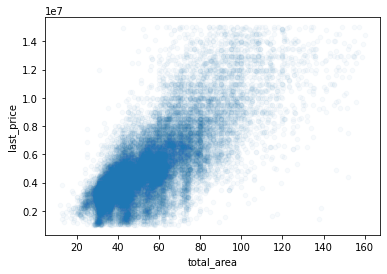

In [ ]:
good_data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.03)

На диаграмме хорошо видно, что площадь объекта является одним из определяющих факторов цены объекта

##### Зависимость цены от жилой площади объекта

In [ ]:
good_data['living_area'].corr(good_data['last_price'])

0.6260216106273697

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

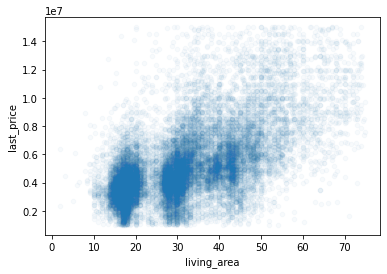

In [ ]:
good_data.query('living_area < 75').plot(x='living_area', y='last_price', kind='scatter', alpha=0.03)

Положительная корреляция присутсвует между ценой и жилой площадью и это логично раз в предыдещем задании подтвердили зависимость цены от площади. Однако, корреляция здесь меньше. Объясняется тем, что в жилую площадь не входят балконы, санузлы, коридоры, а их площадь и количество влияют на цену.

##### Зависимость цены от площади кухни

In [ ]:
good_data['kitchen_area'].corr(good_data['last_price'])

0.5325028079717565

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

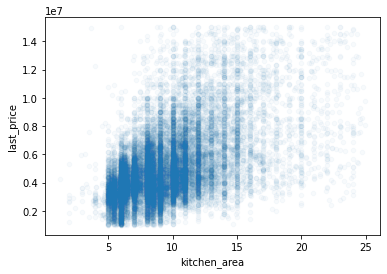

In [ ]:
good_data.query('kitchen_area < 25').plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.03)

Видим, что небольшая связь цены и площади кухни есть только для малых площадей. Однако, потом цена не зависит от площади кухни. Объясняется тем, что однокомнатные квартиры и трехкомнатные могут иметь схожую площадь кухни, однако цена у этих квартир совершенно разная из-за, как минимум, разной общей площади.

##### Зависимость цены от количества комнат

In [ ]:
good_data['rooms'].corr(good_data['last_price'])

0.4809621818551761

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

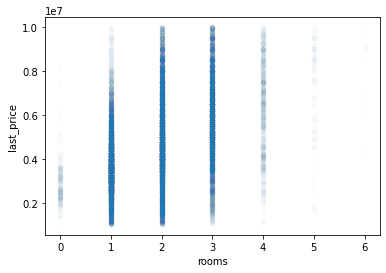

In [ ]:
good_data.query('1000000 < last_price < 10000000')\
.plot(x='rooms', y='last_price', kind='scatter', alpha=0.01)

В данном случае можно говорить об практическом отсутствии корреляции между ценой и количесвом комнат. Схожие по общей площади квартиры с эквивалентной стоимостью могут иметь разное число комнат, поэтому цена практически не зависит от кол-ва комнат

##### Зависимость цены от этажа (первый, последний, другой)

Чтобы это выяснить рассчитаем средние и медианные значения общей цены в данных группах, используя данные из good_data (датасет без сильных выбросов):

In [ ]:
good_data_floor = good_data.pivot_table(index='floor_type', values='last_price', aggfunc=['median','mean', 'count'])
good_data_floor.columns = ['median_last_price', 'mean_last_price', 'count']

good_data_floor.sort_values('median_last_price').head()

,median_last_price,mean_last_price,count
floor_type,,,
первый,3900000.0,4.335760e+06,2749
последний,4200000.0,4.889119e+06,3054
другой,4680000.0,5.344478e+06,16155


Из анализа видно, что квартиры на первом этаже оцениваются дешевле всего. Квартиры на последнем этаже также стоят дешевле чем на этажах посередине дома. В итоге, самые дорогие квартиры на этажах между первым и последним.

##### Зависимость цены от даты размещения (день недели, месяц, год)

In [ ]:
good_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,cityCenters_nearest_km
count,21958.000000,2.195800e+04,21958.000000,21958.000000,21958.000000,21958.000000,20262.000000,21958.000000,19875.000000,21958.000000,16704.000000,16719.000000,16720.000000,7078.000000,16720.000000,8086.000000,19230.000000,21958.000000,21958.000000,21958.000000,21958.000000,16719.000000
mean,9.749522,5.154860e+06,54.804475,1.969032,2.672623,10.818016,31.424404,5.908325,9.856213,0.598734,28886.550826,14746.073868,0.567165,492.293868,0.717165,530.923819,175.973167,94224.963058,2.570362,6.402997,2017.378677,14.741671
std,5.581707,2.634383e+06,20.680427,0.933918,0.162713,6.550301,14.434043,4.850464,4.184130,0.953810,12883.985807,8507.721304,0.768207,336.748442,0.897107,276.160617,215.060427,30181.798314,1.794046,3.489102,1.027878,8.514596
min,0.000000,1.000000e+06,12.000000,0.000000,2.300000,1.000000,2.000000,1.000000,1.300000,0.000000,6450.000000,287.000000,0.000000,1.000000,0.000000,13.000000,1.000000,10507.246377,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,39.400000,1.000000,2.600000,5.000000,18.300000,2.000000,7.000000,0.000000,18142.250000,10334.000000,0.000000,292.000000,0.000000,316.000000,44.000000,76000.000000,1.000000,3.000000,2017.000000,10.000000
50%,9.000000,4.500000e+06,50.100000,2.000000,2.650000,9.000000,29.800000,4.000000,9.000000,0.000000,27042.500000,13437.000000,0.000000,456.000000,0.000000,516.500000,93.000000,93735.356139,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.275750e+06,65.500000,3.000000,2.700000,16.000000,40.200000,8.000000,11.200000,1.000000,37535.250000,16554.500000,1.000000,614.000000,1.000000,741.000000,223.000000,111111.111111,4.000000,10.000000,2018.000000,17.000000
max,50.000000,1.500000e+07,160.000000,6.000000,3.500000,28.000000,128.000000,25.000000,64.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,387096.774194,6.000000,12.000000,2019.000000,66.000000


In [ ]:
good_data_day = good_data.pivot_table(index='weekday', values='last_price', aggfunc=['mean', 'median', 'count'])
good_data_day.columns = ['last_price_mean', 'last_price_median', 'count']

good_data_day.sort_values('last_price_median')

,last_price_mean,last_price_median,count
weekday,,,
4,5.126298e+06,4490000.0,3727
0,5.133826e+06,4500000.0,3352
3,5.160840e+06,4500000.0,3918
5,5.073240e+06,4500000.0,1798
6,5.102250e+06,4500000.0,1593
2,5.187186e+06,4550000.0,3660
1,5.222832e+06,4600000.0,3910


<AxesSubplot:xlabel='weekday'>

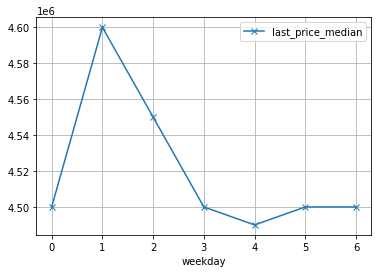

In [ ]:
good_data_day.plot(y='last_price_median', grid=True, style='x-')

Видим, что медианая цена практически не зависит от дня недели (разброс всего лишь 0,1 млн). Самые дорогие объявления выкладываются во вторник и среду. Также помним, что количество объявлений в будни больше, чем в выходные

**Зависимость цены от месяцы**

In [ ]:
good_data_month = good_data.pivot_table(index='month', values='last_price', aggfunc=['mean', 'median', 'count'])
good_data_month.columns = ['last_price_mean', 'last_price_median', 'count']

good_data_month.sort_values('last_price_median')

,last_price_mean,last_price_median,count
month,,,
6,4.970116e+06,4300000.0,1633
5,5.157665e+06,4450000.0,1173
1,5.113323e+06,4500000.0,1379
2,5.137142e+06,4500000.0,2437
3,5.133593e+06,4500000.0,2403
7,5.137603e+06,4500000.0,1561
8,5.153696e+06,4500000.0,1624
10,5.109732e+06,4500000.0,1987
11,5.222604e+06,4535000.0,2202


<AxesSubplot:xlabel='month'>

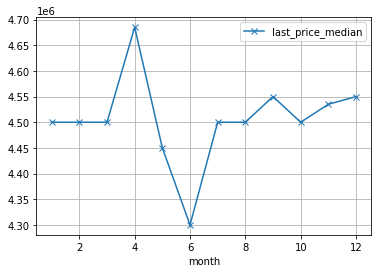

In [ ]:
good_data_month.plot(y='last_price_median', grid=True, style='x-')

<AxesSubplot:xlabel='month'>

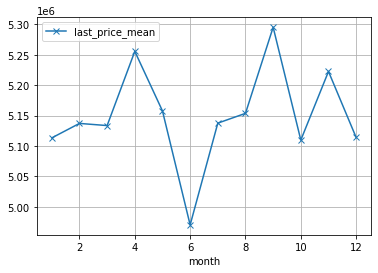

In [ ]:
good_data_month.plot(y='last_price_mean', grid=True, style='x-')

Видим, что цена квартиры зависит от месяцы размещения объявления. В июне стоимость квартир минимальна, в декабре максимальна (однако не стоит забывать, что именно в декабре и июне было меньшее количество объявлений). Объяснить график можно тем, что в начале лета и спрос и предложение небольшое ввиду сезона отпусков и летних работ на дачах, поэтому цены временно проседают, однако уже к августу/сентябрю цены и предложение/спрос восстанавливаются по мере возвращения людей в города. 

**Зависимость цены от года**

In [ ]:
good_data_year = good_data.pivot_table(index='year', values='last_price', aggfunc=['mean', 'median', 'count'])
good_data_year.columns = ['last_price_mean', 'last_price_median', 'count']

good_data_year.sort_values('last_price_median')

,last_price_mean,last_price_median,count
year,,,
2017,5.060241e+06,4350000.0,7608
2016,5.115967e+06,4390000.0,2555
2018,5.064373e+06,4500000.0,7971
2019,5.456603e+06,4950000.0,2663
2015,5.676352e+06,5000000.0,1056
2014,6.928793e+06,6051250.0,105


<AxesSubplot:xlabel='year'>

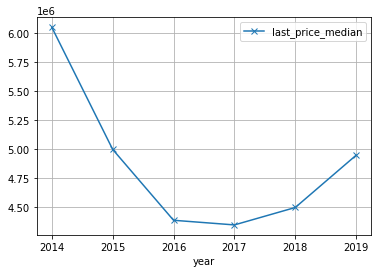

In [ ]:
good_data_year.plot(y='last_price_median', grid=True, style='x-')

График получился очень правдоподобным: в 2014 году был кризис и недвижимость резко выросла, однако затем было снижение цен к 2017 году. После чего цены вновь начали плавно расти

In [ ]:
good_data['last_price'].count()

21958

In [ ]:
good_data.shape[0] / data.shape[0]

0.926536984682898

Мы сохранили почти 22000 строк из первоначальных 23699, таким образом отсеяли менее 10 процентов

#### Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?

In [ ]:
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21958 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21958 non-null  int64         
 1   last_price              21958 non-null  float64       
 2   total_area              21958 non-null  float64       
 3   first_day_exposition    21958 non-null  datetime64[ns]
 4   rooms                   21958 non-null  int64         
 5   ceiling_height          21958 non-null  float64       
 6   floors_total            21958 non-null  int64         
 7   living_area             20262 non-null  float64       
 8   floor                   21958 non-null  int64         
 9   is_apartment            21958 non-null  bool          
 10  studio                  21958 non-null  bool          
 11  open_plan               21958 non-null  bool          
 12  kitchen_area            19875 non-null  float6

In [ ]:
data_price = good_data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['median', 'count'])\
.reset_index()
data_price.columns = ['locality_name', 'median_price_square_meter', 'count']
data_price = data_price.sort_values(by='count', ascending=False).reset_index(drop=True)
data_price.head(10)

,locality_name,median_price_square_meter,count
0,санкт-петербург,102834.720720,14318
1,поселок мурино,86075.949367,545
2,поселок шушары,76829.268293,439
3,всеволожск,65789.473684,393
4,пушкин,99487.076139,348
5,колпино,74722.222222,337
6,поселок парголово,91642.857143,311
7,гатчина,67924.528302,305
8,деревня кудрово,91860.465116,299
9,выборг,58417.022969,224


По заданию нам надо отобрать 10 населенных пунктов с самым большим числом объялений. Сделаем срез и перезапишем датасет data_price и затем отсортируем по медианной цене

In [ ]:
data_price = data_price.query('count >= @data_price["count"][9]')
data_price = data_price.sort_values(by='median_price_square_meter', ascending=False)
data_price

,locality_name,median_price_square_meter,count
0,санкт-петербург,102834.720720,14318
4,пушкин,99487.076139,348
8,деревня кудрово,91860.465116,299
6,поселок парголово,91642.857143,311
1,поселок мурино,86075.949367,545
2,поселок шушары,76829.268293,439
5,колпино,74722.222222,337
7,гатчина,67924.528302,305
3,всеволожск,65789.473684,393
9,выборг,58417.022969,224


Видим, что средняя цена квадратного метра дороже всего в Санкт-Петербурге и пригороде - в г. Пушкин. Дешевле же всего из нашего топ 10 - цена квадратного метра в Выборге.

<AxesSubplot:xlabel='median_price_square_meter', ylabel='locality_name'>

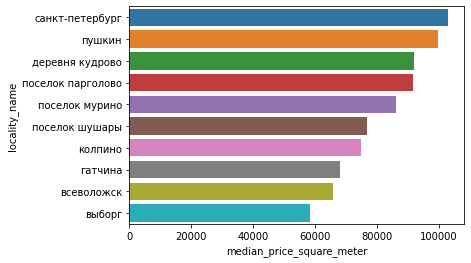

In [ ]:
sns.barplot(data=data_price, y='locality_name', x='median_price_square_meter')

#### Вычислим среднюю стоимость квартир на каждый км в Санкт-Петербурге по мере удаления от центра

In [ ]:
good_data['cityCenters_nearest_km'].head()

0    16.0
1    19.0
2    14.0
4     8.0
5     NaN
Name: cityCenters_nearest_km, dtype: float64

In [ ]:
price_peterburg_km = good_data[good_data['locality_name'] == 'санкт-петербург']

price_peterburg_km.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой,16.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой,8.0
7,5,7915000.0,71.6,2019-04-18,2,2.65,24,NaN,22,False,False,False,18.9,2,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.692737,3,4,2019,другой,12.0
9,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,False,False,False,6.5,2,санкт-петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.590164,6,2,2017,другой,15.0


In [ ]:
len(price_peterburg_km)

14318

In [ ]:
price_peterburg_km['cityCenters_nearest_km'].isna().sum()

45

по 45 строкам пропущена информация с расстоянием до центра. В процентном соотношении - это 0.3%, поэтому можем удалить строки с пропущенным расстоянием до центра

In [ ]:
#price_peterburg_km['cityCenters_nearest_km'].dropna()

price_peterburg_km = price_peterburg_km[price_peterburg_km['cityCenters_nearest_km'].isna() == False]

print(len(price_peterburg_km))

14273


In [ ]:
price_peterburg_km['cityCenters_nearest_km'].isna().sum()

0

Строки с пропущенным расстоянием удалены. Теперь можем группировать данные с помощью сводной таблицы и затем построим график зависимости цены квадратного метра от расстояния до центра 

In [ ]:
price_peterburg_km_group = price_peterburg_km.\
pivot_table(index='cityCenters_nearest_km', values='price_square_meter', aggfunc=['median', 'count'])
price_peterburg_km_group.columns = ['median_price_square_meter', 'count']
price_peterburg_km_group.head(6)

,median_price_square_meter,count
cityCenters_nearest_km,,
0.0,104081.632653,8
1.0,113960.068840,120
2.0,115151.515152,199
3.0,105250.000000,266
4.0,110966.542751,521
5.0,121000.000000,663


<AxesSubplot:xlabel='cityCenters_nearest_km'>

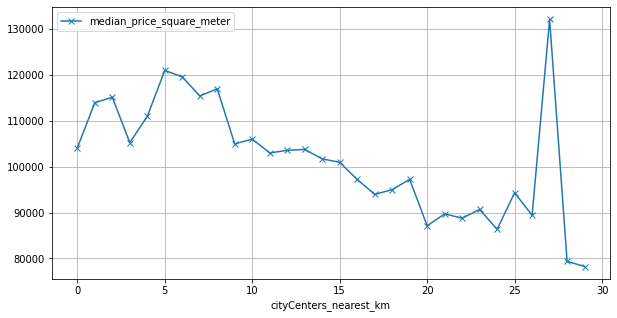

In [ ]:
price_peterburg_km_group.plot(y='median_price_square_meter', grid=True, style='x-', figsize=(10,5))

Цена квадратного метра самая высокая в радиусе 5 км от центра Питера и далее цена плавно снижается. Результат выглядит ожидаемым. Однако, есть экстремум при 27 км. Посмотрим его более детально:

In [ ]:
price_peterburg_km_group.loc[27]

median_price_square_meter    132115.709459
count                             2.000000
Name: 27.0, dtype: float64

Всего 2 объекта в датасете находятся на расстоянии 27 км. Поэтому экстремум на 27 км считаем выбросом

### Общий вывод

В результате анализа обнаружены следующие закономерности:

- самое большое влияние на цену оказывает общая площадь (коэффициента корреляции Пирсона составил 0.75), т.е. чем больше площадь, тем с высокой вероятностью цена;


- квартиры на первом (медианная цена 3.9 млн) и последнем этажах (медианная цена 4.2 млн) дешевле квартир между ними (медианная цена 4.68 млн);


- в летний период и ближе к выходным дням цены имеют тенденцию к снижению, а количество объявлений уменьшается. Скорее всего связано с тем, что объявления выкладывают риэлторы в будние дни, а также тем, что в начале лета людям как правило не до покупки/продажи квартир из-за сезона отпусков/дач;


- цена недвижимости увеличивается при приближении к центру города Санкт-Петербург (в радиусе 5 км от центра цена квадратного метра самая высокая (121 тыс руб против медианной по городу цены квадратного метра в  103 тыс руб);


- По Ленинградской области и г. Санкт-Петербургу получилось, что средняя цена квадратного метра дороже всего в Санкт-Петербурге и пригороде - в г. Пушкин. Дешевле же всего из нашего топ 10 - цена квадратного метра в Выборге.


- цена недвижимости была максимальной в момент кризиса 2014 года, однако затем следовал трехлетний спад цент до 2017 года. Здесь можно сделать вывод, что в периоды нестабильности и экономических кризисов цены на недвижимость растут;


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод